Dimensiones del dataset: (1014, 7)
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Valores nulos por columna:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_8188\2493172811.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=df, order=['low risk', 'mid risk', 'high risk'], palette='viridis')


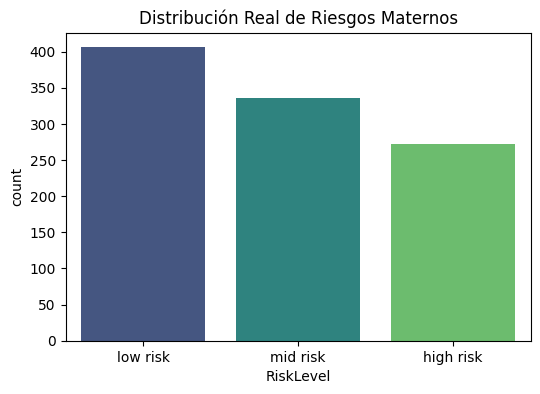

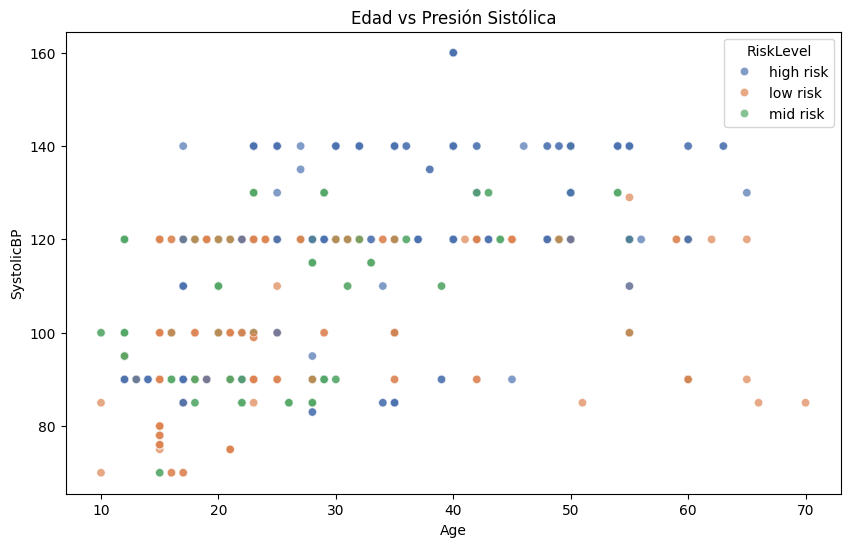

Dataset procesado guardado en '../data/maternal_risk_processed.csv'


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset real
# Asegúrate de haber guardado el archivo en la carpeta 'data'
df = pd.read_csv('../data/Maternal Health Risk Data Set.csv')


print(f"Dimensiones del dataset: {df.shape}")
print(df.head())

# 2. Preprocesamiento básico para el análisis
# Verificamos si hay nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 3. Análisis de la variable objetivo (Target)
plt.figure(figsize=(6,4))
sns.countplot(x='RiskLevel', data=df, order=['low risk', 'mid risk', 'high risk'], palette='viridis')
plt.title('Distribución Real de Riesgos Maternos')
plt.show()

# 4. Relación: Edad vs Presión Sanguínea vs Riesgo
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='SystolicBP', hue='RiskLevel', data=df, palette='deep', alpha=0.7)
plt.title('Edad vs Presión Sistólica')
plt.show()

# 5. Guardar una versión procesada 
# Mapeamos a números para que los modelos de Deep Learning lo entiendan después
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['Risk_Num'] = df['RiskLevel'].map(risk_mapping)

# Guardamos este CSV limpio para usarlo en el entrenamiento
df.to_csv('../data/maternal_risk_processed.csv', index=False)
print("Dataset procesado guardado en '../data/maternal_risk_processed.csv'")